In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from fastai.vision.all import *


In [2]:
DATA_PATH = '../data/'
path = untar_data(URLs.IMAGENETTE_160,dest=DATA_PATH)
path

Path('../data/imagenette2-160')

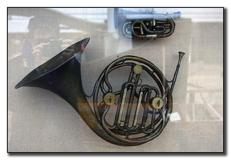

In [3]:
fname = (path/"train/n03394916").ls()[0]
PILImage.create(fname)

In [5]:
lbl_dict = dict(
    n01440764='tench',
    n02102040='English springer',
    n02979186='cassette player',
    n03000684='chain saw',
    n03028079='church',
    n03394916='French horn',
    n03417042='garbage truck',
    n03425413='gas pump',
    n03445777='golf ball',
    n03888257='parachute'
)
def label_func(fname):
    return lbl_dict[parent_label(fname)] #parent_label is a fastai function which takes the parent file name

In [8]:
db = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='val'),
                 get_y=label_func,
                 item_tfms=Resize(64),
                 #batch_tfms=aug_transforms(size=224, min_scale=0.75)
              )
dls = db.dataloaders(path)

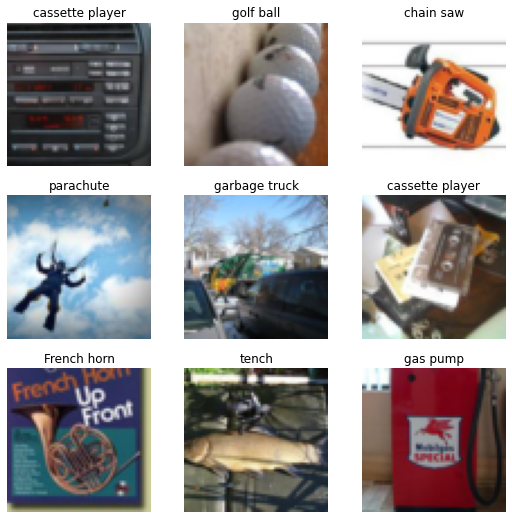

In [9]:
dls.show_batch()

In [49]:
# try cnn learner
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,2.243585,1.589968,0.482803,01:26


epoch,train_loss,valid_loss,error_rate,time
0,1.501592,1.101726,0.348535,02:58
1,1.096484,0.985461,0.318981,02:57


In [75]:
model.eval()

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [76]:
def np_to_tensor(img):
    return torch.Tensor(img).permute(2,0,1).float()/255.0

size = 160
img = PILImage.create(fname).resize((size,size))
img = np.array(img)
pred = model(np_to_tensor(img).unsqueeze(0))
pred

tensor([[ -0.5214,  -6.3143, -11.9109,  -1.4191,   0.9506,   0.1775,   4.8520,
           1.3821,   2.1305,   2.8104]], grad_fn=<MmBackward>)

In [27]:
labels = [lbl_dict[folder.name] for folder in (path/'train').ls()]
labels

['French horn',
 'garbage truck',
 'golf ball',
 'English springer',
 'gas pump',
 'parachute',
 'church',
 'chain saw',
 'tench',
 'cassette player']

In [33]:
labels[pred.argmax()]

'chain saw'